# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
cities

['barrow',
 'tezu',
 'katherine',
 'nanortalik',
 'tuatapere',
 'kavaratti',
 'morehead',
 'mahebourg',
 'tuktoyaktuk',
 'iqaluit',
 'fairlie',
 'dunedin',
 'hermanus',
 'saskylakh',
 'hasaki',
 'butaritari',
 'limon',
 'bocaranga',
 'isla vista',
 'bria',
 'jamestown',
 'adrar',
 'massakory',
 'geraldton',
 'albany',
 'pacific grove',
 'tsihombe',
 'barentsburg',
 'nurota',
 'avarua',
 'baringo',
 'ushuaia',
 'busselton',
 'caibarien',
 'price',
 'terrace',
 'olafsvik',
 'viedma',
 'tiksi',
 'yulara',
 'salina',
 'hofn',
 'sorong',
 'belushya guba',
 'arraial do cabo',
 'nikolskoye',
 'airai',
 'kapaa',
 'varberg',
 'vaini',
 'hilo',
 'hobart',
 'coquimbo',
 'san patricio',
 'samdrup jongkhar',
 'ponta do sol',
 'georgetown',
 'maningrida',
 'lagoa',
 'mar del plata',
 'yellowknife',
 'kaitangata',
 'victoria',
 'grand river south east',
 'port lincoln',
 'hami',
 'general pico',
 'panama city',
 'new norfolk',
 'yaan',
 'vestmannaeyjar',
 'punta arenas',
 'saint george',
 'mataura',


In [4]:
# city1="alghero"
# city1



In [5]:
# API_KEY=weather_api_key

# url = f"http://api.openweathermap.org/geo/1.0/direct?q={city1}&appid={API_KEY}"
# response = requests.get(url)
# data = response.json()
# data
# # lat=data[0]["lat"]
# # lon=data[0]["lon"]
# # print(lat, lon)


In [6]:
# url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=imperial"
# # print(url)
# response = requests.get(url)
# print(response.status_code)

In [3]:
# data = response.json()
# data

In [4]:
# data.keys()

In [5]:
# data["weather"][0]["main"]

In [6]:
# data["main"]["temp"]

In [7]:
# data["main"]["humidity"]

In [8]:
# data["wind"]["speed"]

In [9]:
# data["clouds"]["all"]

In [25]:
API_KEY=weather_api_key

rows=[]

for city in cities:
    print()
    print(city)
    row={}
     # get the geocode, lat and long
    url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code==200:
        data = response.json()

        # parse data
        if(len(data)>0):
            lat = data[0]["lat"]
            lon = data[0]["lon"]

            #second Request
            url2 = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_KEY}&units=imperial"
            response2 = requests.get(url2)
            if response2.status_code==200:
                data2 = response2.json()

                # parse data
                temperature = data2["main"]["temp"]
                humidity = data2["main"]["humidity"]
                windspeed = data2["wind"]["speed"]
                cloudiness = data2["clouds"]["all"]
#             else:
#                 temperature = np.nan
#                 humidity = np.nan
#                 windspeed = np.nan
#                 cloudiness = np.nan

                # put into flat dictionary
                row["City"] = city
                row["Latitude"] = lat
                row["Longitude"] = lon
                row["Temperature"] = temperature
                row["Humidity"] = humidity
                row["Windspeed"] = windspeed
                row["Cloudiness"] = cloudiness

                #append to list
                rows.append(row)
            else:
#                 print(f"no lag lon for {city}")
                pass
        else:
            pass
    else:
#         print("Failed Request for geocode for{city}")
        pass
# sleep
    time.sleep(3)


barrow

tezu

katherine

nanortalik

tuatapere

kavaratti

morehead

mahebourg

tuktoyaktuk

iqaluit

fairlie

dunedin

hermanus

saskylakh

hasaki

butaritari

limon

bocaranga

isla vista

bria

jamestown

adrar

massakory

geraldton

albany

pacific grove

tsihombe

barentsburg

nurota

avarua

baringo

ushuaia

busselton

caibarien

price

terrace

olafsvik

viedma

tiksi

yulara

salina

hofn

sorong

belushya guba

arraial do cabo

nikolskoye

airai

kapaa

varberg

vaini

hilo

hobart

coquimbo

san patricio

samdrup jongkhar

ponta do sol

georgetown

maningrida

lagoa

mar del plata

yellowknife

kaitangata

victoria

grand river south east

port lincoln

hami

general pico

panama city

new norfolk

yaan

vestmannaeyjar

punta arenas

saint george

mataura

khatanga

miri

chuy

bethel

taolanaro

longyearbyen

sentyabrskiy

codrington

lac du bonnet

kodiak

cape town

japura

ust-kut

saint anthony

samusu

belyy yar

yalutorovsk

saint-philippe

acapulco

ribeira grande



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
df=pd.DataFrame(rows)
df.shape

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
df.to_csv('city_weather.csv',index = False)


In [3]:
df=pd.read_csv('city_weather.csv')

In [6]:
df.shape

(586, 7)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

mask=df.Humidity<100
df=df.loc[mask,:].reset_index(drop=True) 
df.head()



,City,Latitude,Longitude,Temperature,Humidity,Windspeed,Cloudiness
0,barrow,71.290556,-156.788611,24.82,80,23.02,100
1,tezu,27.925420,96.164714,71.94,47,0.92,0
2,katherine,-14.464616,132.263599,93.51,38,8.05,29
3,nanortalik,60.140025,-45.242852,27.86,87,3.20,100
4,tuatapere,-46.132310,167.690763,65.89,51,5.44,83


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, ' Latitude vs Temperature - 11/07/2022')

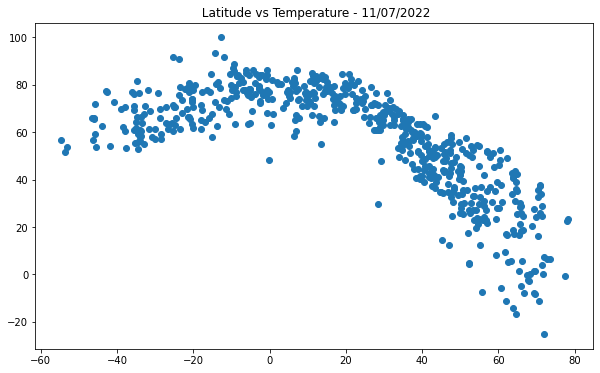

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df.Latitude, df.Temperature)
plt.title(" Latitude vs Temperature - 11/07/2022")

In [ ]:
#From this plot can see highter the temperature lower the latitude

## Latitude vs. Humidity Plot

Text(0.5, 1.0, ' Latitude vs Humidity - 11/07/2022')

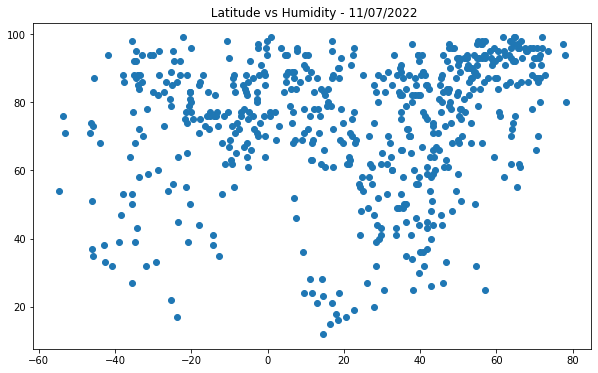

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.Latitude, df.Humidity)
plt.title(" Latitude vs Humidity - 11/07/2022")

In [ ]:
# there is no relationship for Latitude vs Humidity

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, ' Latitude vs Cloudiness - 11/07/2022')

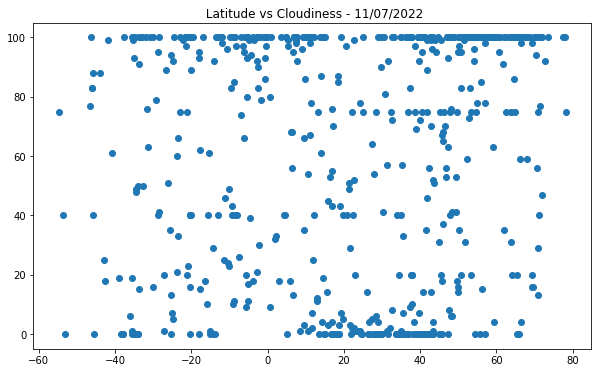

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df.Latitude, df.Cloudiness)
plt.title(" Latitude vs Cloudiness - 11/07/2022")

In [ ]:
# there is no relationship for Latitude vs Cloudiness 

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, ' Latitude vs Windspeed - 11/07/2022')

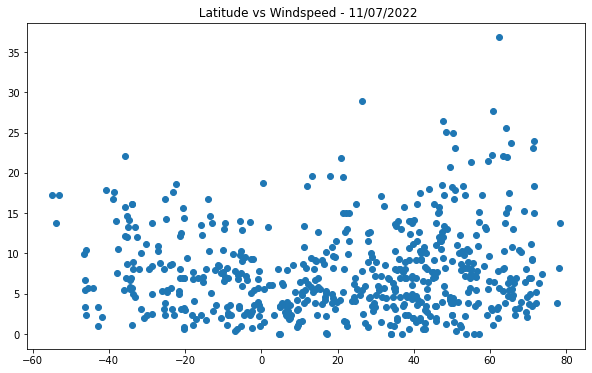

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.Latitude, df.Windspeed)
plt.title(" Latitude vs Windspeed - 11/07/2022")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7413365597109854


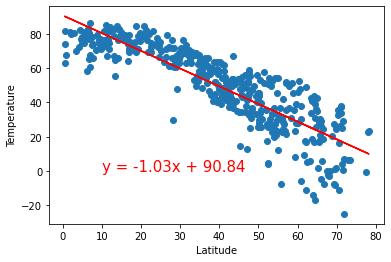

In [6]:
df2 = df.loc[df.Latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.33624372958171106


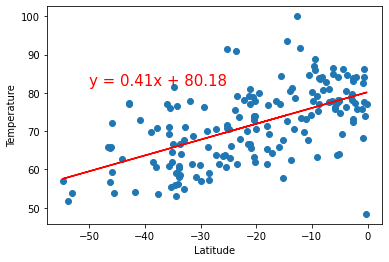

In [11]:
df2 = df.loc[df.Latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,82),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08326463498389837


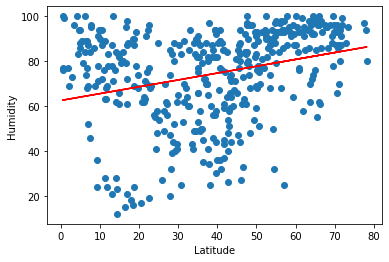

In [9]:
df2 = df.loc[df.Latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06418451155451167


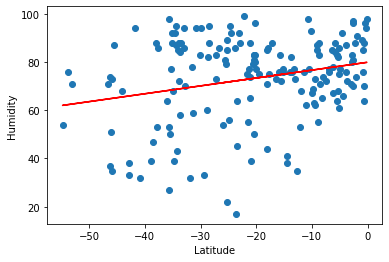

In [12]:
df2 = df.loc[df.Latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06550043201403274


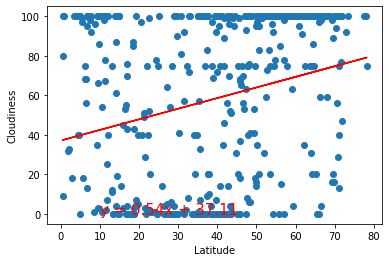

In [13]:
df2 = df.loc[df.Latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
#can predict the Cloudiness vs. Latitude with Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04414302893895291


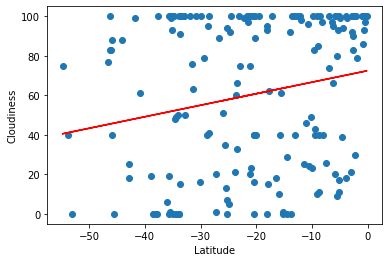

In [14]:
df2 = df.loc[df.Latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04500115025827524


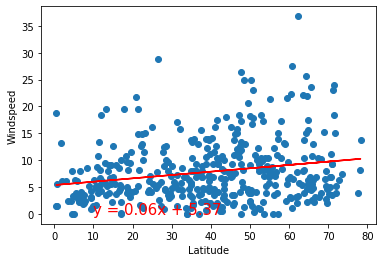

In [15]:
df2 = df.loc[df.Latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08684948448607309


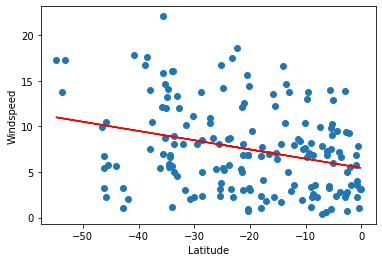

In [16]:
df2 = df.loc[df.Latitude < 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['Latitude']
y_values = df2['Windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
plt.show()